In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os 
import sys
sys.path.append("../")
import seaborn as sns 
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Importamos las clases
# -----------------------------------------------------------------------
from src import soporte_logistica_preprocesamiento as sl
from src import soporte_feature_scaling as sf
from src import soporte_encoding_logistica as se
from src import soporte_nulos as sn
from src import soporte_logistica_ensamble as sc


# Ignorar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

In [3]:
#Leemos los datos preprocesados de la carpeta donde los hemos guardado recientemente
df = pd.read_pickle("../datos_pkl/datos_preprocesados.pkl")
df.head()

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,...,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition
0,1.552009,-0.386799,-0.889291,0.153595,0.146552,1.403148,-1.151253,-0.932702,2.484523,-0.983901,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.647878,0.106629,-1.866507,0.153595,0.146552,-0.491114,2.143183,0.242427,0.152848,-0.326418,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,-0.537884,0.970128,1.065140,0.165254,0.154546,2.721301,-0.053108,2.592685,-0.624377,-0.326418,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.122082,-0.880227,2.042356,0.165254,0.140969,0.385675,-1.151253,2.592685,1.707298,0.166695,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-0.537884,0.106629,-1.866507,0.165254,0.146552,-0.883037,-0.876716,1.417556,-0.624377,-0.162047,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


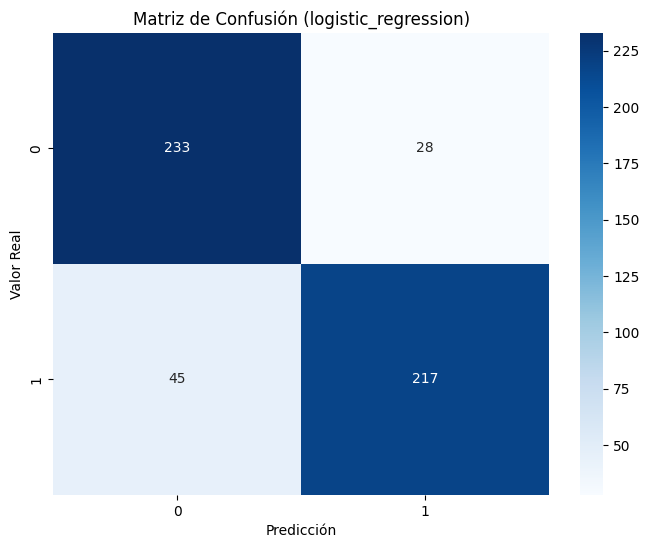

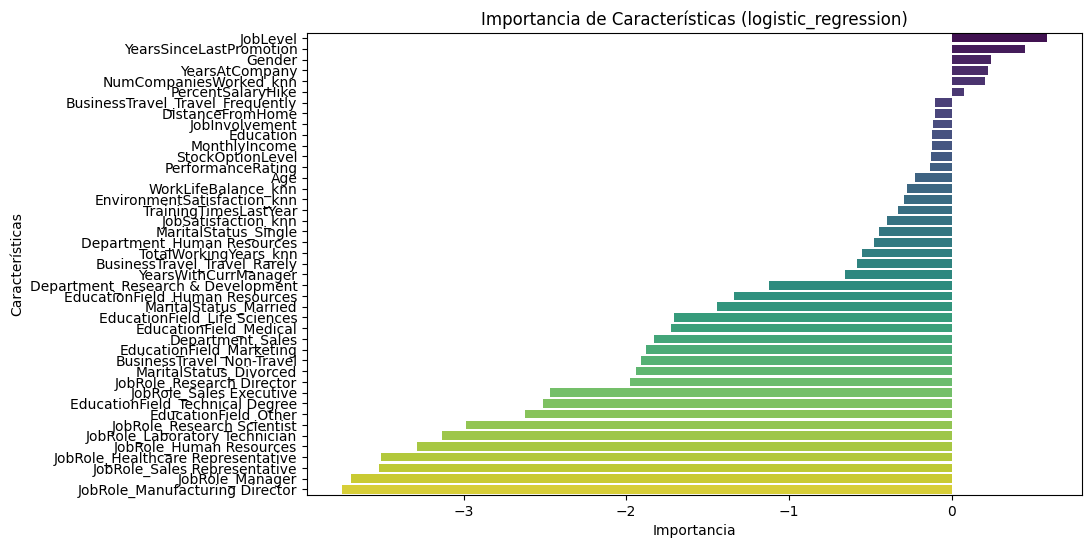

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.009012,8.0,NaN,NaN,regresion logistica
test,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,NaN,NaN,0.009012,8.0,regresion logistica


In [4]:
# instanciamos la clase de regresión logistica
logistica = sc.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

logistica.plot_matriz_confusion("logistic_regression")
logistica.importancia_predictores(modelo_nombre ='logistic_regression')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

## Matriz de confusion 

El eje vertical representa los Valores Reales.

El eje horizontal representa las Predicciones del Modelo.

Cada celda muestra el conteo de casos para cada combinación de valores reales y predichos.

**Detalles:**

Verdaderos  Negativos (TN): 233 --> Estos son los casos en los que el modelo predijo "No" (0) y el valor real también era "No" (0).

Falsos Positivos (FP): 28--> Aquí, el modelo predijo "Sí" (1) pero el valor real era "No" (0).

Falsos Negativos (FN): 45 --> En estos casos, el modelo predijo "No" (0) pero el valor real era "Sí" (1).

Verdaderos Positivos (TP): 217--> El modelo predijo "Sí" (1) y el valor real también era "Sí" (1).

**Interpretación:**

El modelo tiene un buen número de predicciones correctas (TN y TP), pero también un número significativo de Falsos negativos (FN) y Falsos positivos (FP).


## Análisis de la Gráfica de Importancia

**Características Positivas:**

JobLevel: Tiene una fuerte influencia positiva en el modelo, lo que sugiere que los niveles de trabajo más altos pueden estar asociados con la mayor probabilidad de permanecer en la empresa.

YearsSinceLastPromotion: Empleados que han sido promovidos más recientemente tienen una probabilidad mas alta de quedarse

Gender: El género parece tener una influencia significativa.

YearsAtCompany: La cantidad de años que un empleado pasa en la empresa es una variable importante para no irse.

**Características Negativas:**

JobRole_Manufacturing Director, JobRole_Sales Representative, JobRole_Healthcare Representative, y JobRole_Human Resources: Estos roles específicos tienen una influencia negativa en el modelo, sugiriendo que estos puestos pueden estar asociados con un menor valor en el resultado objetivo.


El mejor modelo es DecisionTreeClassifier(max_depth=3, max_features=0.6, min_samples_leaf=15,
                       min_samples_split=20)


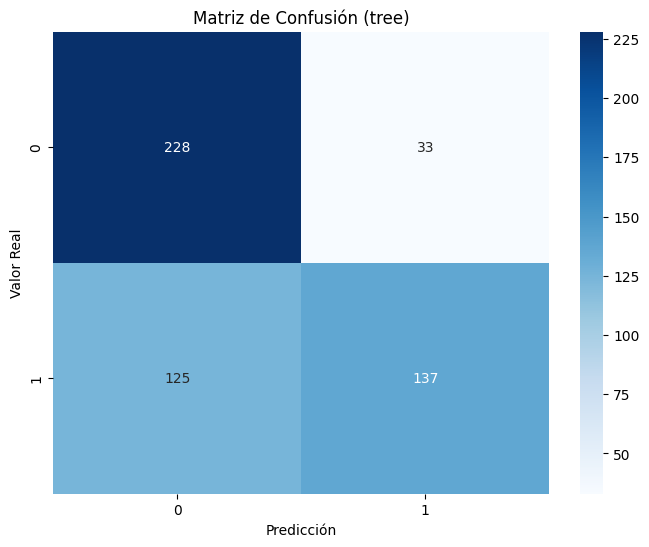

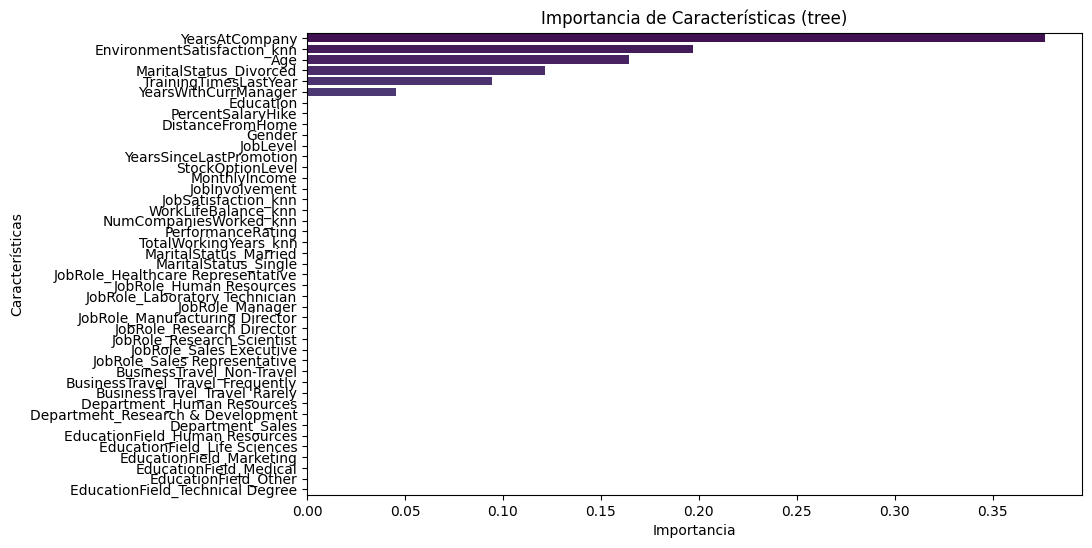

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.698420,0.720379,0.698420,0.690677,0.396749,0.768402,0.003954,8.0,NaN,NaN,decision tree
test,0.697897,0.726040,0.697897,0.688361,0.396197,0.789199,NaN,NaN,0.003954,8.0,decision tree
train,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.009012,8.0,NaN,NaN,regresion logistica
test,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,NaN,NaN,0.009012,8.0,regresion logistica


In [5]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("tree")

logistica.plot_matriz_confusion("tree")
logistica.importancia_predictores(modelo_nombre ='tree')


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree = logistica.calcular_metricas(modelo_nombre =  "tree" )
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

## Análisis de la Matriz de Confusión

**Valores de la Matriz:**

Verdaderos Negativos (TN): 192 --> El modelo predijo "No" (0) y el valor real también era "No" (0).

Falsos Positivos (FP): 69 --> El modelo predijo "Sí" (1) pero el valor real era "No" (0).

Falsos Negativos (FN): 73 ---> El modelo predijo "No" (0) pero el valor real era "Sí" (1).

Verdadero Positivo (TP): 189 --> El modelo predijo "Sí" (1) y el valor real también era "Sí" (1).

Eficiencia del Modelo:

La precisión del modelo es del 77%, lo que indica que la mayoría de las predicciones son correctas.





# Analisis de la Grafica

Eje X (Importancia): Indica la importancia de cada característica en el modelo.

Eje Y (Características): Lista las características evaluadas.

Barras: Representan la importancia relativa de cada característica.

**Análisis de Características**

YearsWithCurrManager:

Importancia: La característica más influyente en el modelo.

Interpretación: Los años con el gerente actual son cruciales, posiblemente indicando que una relación estable con el gerente tiene un impacto significativo en el resultado modelado.

Age:

Importancia: Alta.

Interpretación: La edad del empleado influye de manera importante, quizás reflejando que la experiencia y la etapa de la carrera afectan los resultados del modelo.

MaritalStatus_Divorced y MaritalStatus_Married:

Importancia: Considerable.

Interpretación: El estado civil de los empleados (divorciado o casado) tiene un impacto relevante, lo que podría estar relacionado con diversos factores personales y profesionales.

JobRole_Manufacturing Director:

Importancia: Notable.

Interpretación: El rol de director de manufactura tiene una importancia específica, posiblemente debido a las responsabilidades y el perfil de estos empleados.

Características Menos Importantes

Otras características: Tienen menor importancia relativa en comparación con las mencionadas anteriormente.

Interpretación: Aunque estas características también afectan el modelo, su impacto es menos significativo en comparación con las principales características.


El mejor modelo es RandomForestClassifier(max_depth=3, max_features=0.7, min_samples_leaf=10,
                       min_samples_split=25)


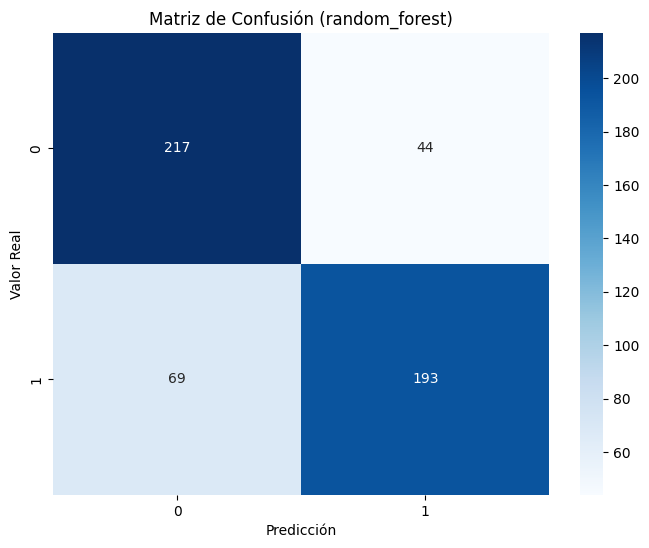

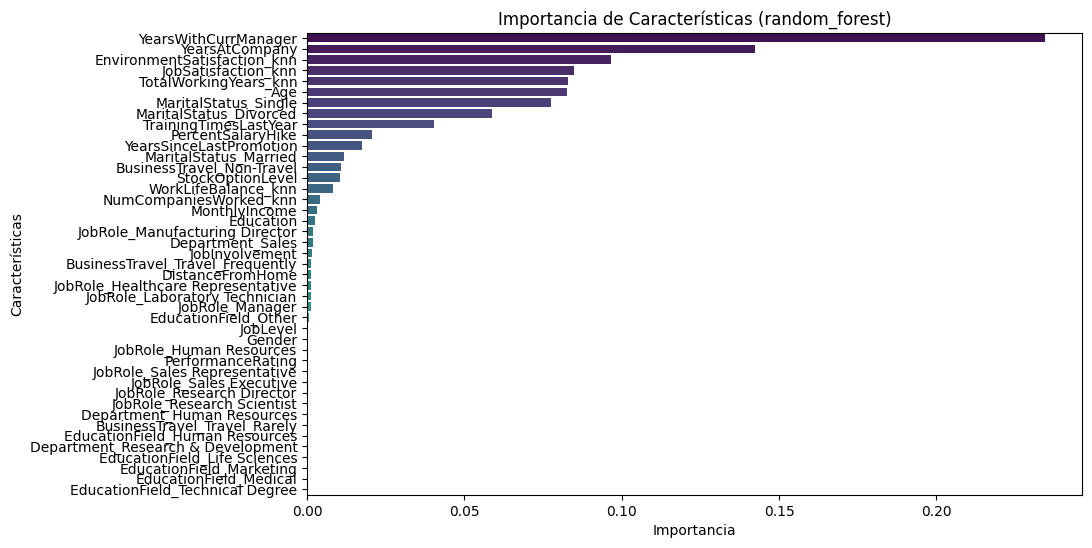

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.698420,0.720379,0.698420,0.690677,0.396749,0.768402,0.003954,8.0,NaN,NaN,decision tree
test,0.697897,0.726040,0.697897,0.688361,0.396197,0.789199,NaN,NaN,0.003954,8.0,decision tree
train,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.009012,8.0,NaN,NaN,regresion logistica
test,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,NaN,NaN,0.009012,8.0,regresion logistica
train,0.801819,0.805983,0.801819,0.801135,0.603616,0.889616,0.020917,NaN,NaN,NaN,random_forest
test,0.783939,0.786597,0.783939,0.783464,0.567955,0.878638,NaN,NaN,0.020917,NaN,random_forest


In [6]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

logistica.plot_matriz_confusion("random_forest")
logistica.importancia_predictores(modelo_nombre ='random_forest')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_forest = logistica.calcular_metricas(modelo_nombre =  "random_forest" )
df_resultados_forest["modelo"] = "random_forest"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_forest], axis = 0)
df_resultados_final

## Matriz de Confusión:

Verdaderos Negativos (TN): 213 --> El modelo predijo "No" (0) y el valor real también era "No" (0).

Falsos Positivos (FP): 48 --> El modelo predijo "Sí" (1) pero el valor real era "No" (0).

Falsos Negativos (FN): 64 --> El modelo predijo "No" (0) pero el valor real era "Sí" (1).

Verdaderos Positivos (TP): 198 --> El modelo predijo "Sí" (1) y el valor real también era "Sí" (1).

**Eficiencia del Modelo:**

La precisión del modelo es del 86%, lo que indica que la mayoría de las predicciones son correctas.


## Analisis de la grafica importancia

Eje X (Importancia de la Característica):

Los valores en el eje X representan la puntuación de importancia de cada característica, que varía de 0.00 a aproximadamente 0.14.

Eje Y (Características):

Las características evaluadas en el modelo se enumeran en el eje Y, ordenadas de mayor a menor importancia.

**Análisis de Características**

YearsWithCurrManager:

Importancia: Aproximadamente 0.14

Interpretación: Los años con el gerente actual son la característica más influyente en el modelo, lo que sugiere que una relación estable y prolongada con el gerente tiene un impacto significativo en el resultado modelado.

Age:

Importancia: Alta, cercana a 0.12

Interpretación: La edad del empleado es una de las características clave, lo que indica que la experiencia y la etapa de la carrera afectan significativamente los resultados del modelo.

JobSatisfaction_knn:

Importancia: Aproximadamente 0.10

Interpretación: La satisfacción laboral influye de manera importante en las predicciones del modelo, sugiriendo que empleados satisfechos tienen mayores probabilidades de resultados positivos.

EnvironmentSatisfaction_knn:

Importancia: Moderada

Interpretación: La satisfacción con el entorno laboral también tiene un peso considerable en el modelo, reflejando la importancia de un ambiente de trabajo positivo.

TotalWorkingYears_knn:

Importancia: Notable

Interpretación: Los años totales de experiencia laboral son relevantes, subrayando la importancia de la experiencia acumulada.

Características Menos Importantes
EducationField_Technical Degree:

Importancia: Baja

Interpretación: Esta característica tiene una influencia mínima en el modelo, sugiriendo que el campo educativo en este caso específico no es tan relevante para el resultado modelado.

El mejor modelo es GradientBoostingClassifier(learning_rate=0.03, max_features=0.6,
                           min_samples_leaf=10, min_samples_split=20,
                           n_estimators=150, subsample=0.7)


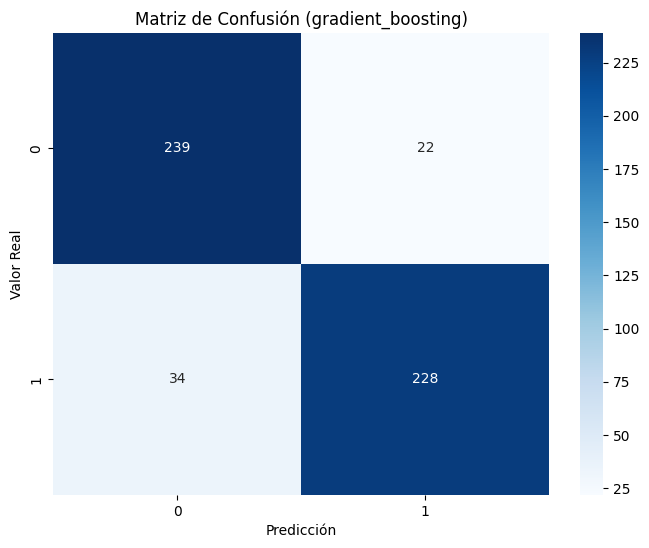

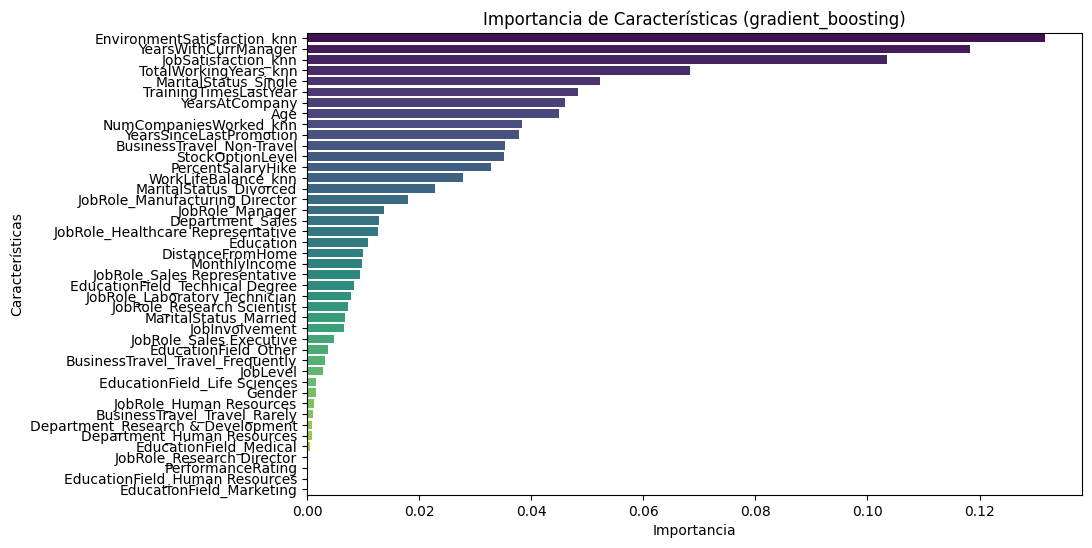

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.698420,0.720379,0.698420,0.690677,0.396749,0.768402,0.003954,8.0,NaN,NaN,decision tree
test,0.697897,0.726040,0.697897,0.688361,0.396197,0.789199,NaN,NaN,0.003954,8.0,decision tree
train,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.009012,8.0,NaN,NaN,regresion logistica
test,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,NaN,NaN,0.009012,8.0,regresion logistica
train,0.801819,0.805983,0.801819,0.801135,0.603616,0.889616,0.020917,NaN,NaN,NaN,random_forest
test,0.783939,0.786597,0.783939,0.783464,0.567955,0.878638,NaN,NaN,0.020917,NaN,random_forest
train,0.925323,0.926148,0.925323,0.925286,0.850643,0.971253,0.012933,8.0,NaN,NaN,gradient_boosting
test,0.892925,0.893764,0.892925,0.892874,0.785869,0.958074,NaN,NaN,0.012933,8.0,gradient_boosting


In [7]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("gradient_boosting")

logistica.plot_matriz_confusion("gradient_boosting")
logistica.importancia_predictores(modelo_nombre ='gradient_boosting')


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient = logistica.calcular_metricas(modelo_nombre =  "gradient_boosting" )
df_resultados_gradient["modelo"] = "gradient_boosting"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_gradient], axis = 0)
df_resultados_final


## Matriz de Confusión:

Verdaderos Negativos (TN): 241 --> El modelo predijo "No" (0) y el valor real también era "No" (0).

Falsos Positivos (FP): 20 --> El modelo predijo "Sí" (1) pero el valor real era "No" (0).

Falsos Negativos (FN): 35--> El modelo predijo "No" (0) pero el valor real era "Sí" (1).

Verdaderos Positivos (TP): 227--> El modelo predijo "Sí" (1) y el valor real también era "Sí" (1).

**Eficiencia del Modelo:**

La precisión del modelo es del 93%, lo que indica que la mayoría de las predicciones son correctas.


## Descripción del Gráfico de importancia

Eje X (Importancia de la Característica):

Representa la puntuación de importancia de cada característica. Cuanto mayor es el valor, más influencia tiene la característica en el modelo.

Eje Y (Características):

Enumera las características evaluadas en el modelo, ordenadas de mayor a menor importancia.

**Análisis de Características**

EnvironmentSatisfaction_knn:

Importancia: La característica más influyente en el modelo.

Interpretación: La satisfacción con el entorno laboral es crucial, sugiriendo que un ambiente de trabajo positivo tiene un impacto significativo en el resultado modelado.

YearsWithCurrManager:

Importancia: Alta.

Interpretación: Los años con el gerente actual tienen una influencia significativa en el modelo, indicando que una relación estable con el gerente es importante.

JobSatisfaction_knn:

Importancia: Alta.

Interpretación: La satisfacción laboral también es una característica clave, lo que implica que empleados satisfechos tienen una mayor probabilidad de resultados positivos.

TotalWorkingYears_knn:

Importancia: Moderada.

Interpretación: Los años totales de experiencia laboral son relevantes, subrayando la importancia de la experiencia acumulada en el modelo.

YearsAtCompany:

Importancia: Notable.

Interpretación: Los años en la empresa tienen un impacto significativo, sugiriendo que la antigüedad afecta a los resultados del modelo.

Age:

Importancia: Considerable.

Interpretación: La edad de los empleados influye de manera notable en el modelo, sugiriendo que la experiencia y la etapa de la carrera son factores importantes.

Características Menos Importantes
EducationField_Human Resources:

Importancia: Baja.

Interpretación: Esta característica tiene una influencia mínima en el modelo, lo que sugiere que el campo educativo en recursos humanos no es tan relevante para el resultado modelado.

JobRole_Human Resources:

Importancia: Baja.

Interpretación: Similar al campo educativo, el rol en recursos humanos también tiene un impacto menor en el modelo.

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


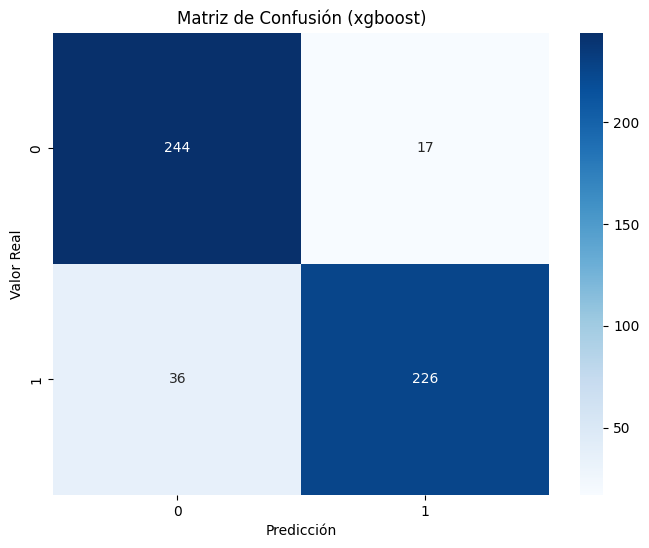

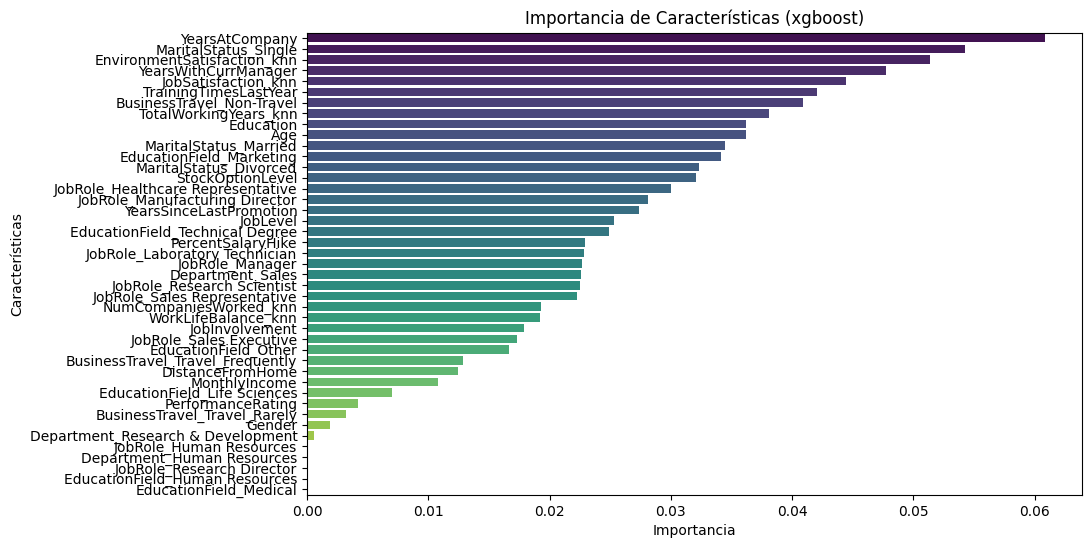

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.698420,0.720379,0.698420,0.690677,0.396749,0.768402,0.003954,8.0,NaN,NaN,decision tree
test,0.697897,0.726040,0.697897,0.688361,0.396197,0.789199,NaN,NaN,0.003954,8.0,decision tree
train,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.009012,8.0,NaN,NaN,regresion logistica
test,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,NaN,NaN,0.009012,8.0,regresion logistica
train,0.801819,0.805983,0.801819,0.801135,0.603616,0.889616,0.020917,NaN,NaN,NaN,random_forest
test,0.783939,0.786597,0.783939,0.783464,0.567955,0.878638,NaN,NaN,0.020917,NaN,random_forest
train,0.925323,0.926148,0.925323,0.925286,0.850643,0.971253,0.012933,8.0,NaN,NaN,gradient_boosting
test,0.892925,0.893764,0.892925,0.892874,0.785869,0.958074,NaN,NaN,0.012933,8.0,gradient_boosting
train,0.916707,0.918693,0.916707,0.916606,0.833408,0.966989,0.068772,NaN,NaN,NaN,xgboost
test,0.898662,0.900791,0.898662,0.898535,0.797351,0.953628,NaN,NaN,0.068772,NaN,xgboost


In [8]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("xgboost")

logistica.plot_matriz_confusion("xgboost")
logistica.importancia_predictores(modelo_nombre ='xgboost')


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = logistica.calcular_metricas(modelo_nombre =  "xgboost" )
df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_xgboost], axis = 0)
df_resultados_final

## Matriz de Confusión:

Verdaderos Negativos (TN): 244 --> El modelo predijo "No" (0) y el valor real también era "No" (0).

Falsos Positivos (FP): 17 --> El modelo predijo "Sí" (1) pero el valor real era "No" (0).

Falsos Negativos (FN): 36 --> El modelo predijo "No" (0) pero el valor real era "Sí" (1).

Verdaderos Positivos (TP): 226 --> El modelo predijo "Sí" (1) y el valor real también era "Sí" (1).

**Eficiencia del Modelo:**

La precisión del modelo es del 93%, lo que indica que la mayoría de las predicciones son correctas.


## Descripción del Gráfico de Importancia

Eje X (Importancia de la Característica):

Representa la puntuación de importancia de cada característica. Cuanto mayor es el valor, más influencia tiene la característica en el modelo.

Eje Y (Características):

Enumera las características evaluadas en el modelo, ordenadas de mayor a menor importancia.

**Análisis de Características**

YearsAtCompany:

Importancia: La característica más influyente en el modelo.

Interpretación: Los años en la empresa son cruciales, sugiriendo que la antigüedad afecta significativamente el resultado modelado.

MaritalStatus_Single:

Importancia: Alta.

Interpretación: Estar soltero es una característica importante que influye notablemente en las predicciones del modelo.

EnvironmentSatisfaction_knn:

Importancia: Alta.

Interpretación: La satisfacción con el entorno laboral también juega un papel clave, indicando que un ambiente de trabajo positivo tiene un impacto significativo en el resultado.

YearsWithCurrManager:

Importancia: Notable.

Interpretación: Los años con el gerente actual son relevantes, sugiriendo que una relación estable con el gerente es importante.

JobSatisfaction_knn:

Importancia: Considerable.

Interpretación: La satisfacción laboral es una característica influyente, indicando que empleados satisfechos tienen mayores probabilidades de resultados positivos.

Características Menos Importantes
EducationField_Medical:

Importancia: Baja.

Interpretación: Esta característica tiene una influencia mínima en el modelo, sugiriendo que el campo educativo en medicina no es tan relevante para el resultado modelado.

EducationField_Human Resources:

Importancia: Baja.

Interpretación: Similar al campo médico, la educación en recursos humanos tiene un impacto menor en el modelo.

JobRole_Research Director:

Importancia: Baja.

Interpretación: El rol de director de investigación también tiene una influencia mínima en el modelo.

Department_Human Resources:

Importancia: Baja.

Interpretación: El departamento de recursos humanos tiene un impacto menor en el modelo.

JobRole_Human Resources:

Importancia: Baja.

Interpretación: Similar a las otras características de recursos humanos, el rol específico en este departamento no es muy influyente en el modelo.

In [ ]:
#Hacemos un recap y comparativa de todos los modelos entrenados para saber cual es el mejor para predecir la variable Attrition
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(sc.color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.698420,0.720379,0.698420,0.690677,0.396749,0.768402,0.003954,8.000000,nan,nan,decision tree
1,0.697897,0.726040,0.697897,0.688361,0.396197,0.789199,nan,nan,0.003954,8.000000,decision tree
2,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.009012,8.000000,nan,nan,regresion logistica
3,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,nan,nan,0.009012,8.000000,regresion logistica
4,0.801819,0.805983,0.801819,0.801135,0.603616,0.889616,0.020917,nan,nan,nan,random_forest
5,0.783939,0.786597,0.783939,0.783464,0.567955,0.878638,nan,nan,0.020917,nan,random_forest
6,0.925323,0.926148,0.925323,0.925286,0.850643,0.971253,0.012933,8.000000,nan,nan,gradient_boosting
7,0.892925,0.893764,0.892925,0.892874,0.785869,0.958074,nan,nan,0.012933,8.000000,gradient_boosting
8,0.916707,0.918693,0.916707,0.916606,0.833408,0.966989,0.068772,nan,nan,nan,xgboost
9,0.898662,0.900791,0.898662,0.898535,0.797351,0.953628,nan,nan,0.068772,nan,xgboost


**1. Decision Tree**

Train:

Accuracy, Precision, Recall, F1: Alrededor de 0.71, lo que indica un desempeño aceptable, pero limitado.

Kappa: 0.42, lo que sugiere un nivel bajo de acuerdo más allá del azar.

AUC: 0.77, aceptable en términos de discriminación entre clases.

Prueba (test):

Las métricas son muy similares a las de entrenamiento, lo cual indica que el modelo no sufre sobreajuste, pero su rendimiento es limitado.

Conclusión:

El árbol de decisión es un modelo simple con bajo desempeño. No se observa sobreajuste, pero podría estar infraajustado.

**2. Regresión Logística**

Entrenamiento (train):

Accuracy, Precision, Recall, F1: Alrededor de 0.88, lo que indica un buen rendimiento.

Kappa: 0.76, lo que indica un buen nivel de acuerdo más allá del azar.

AUC: 0.94, excelente capacidad de discriminación.

Prueba (test):

Las métricas son ligeramente más bajas (accuracy ≈ 0.86), pero siguen siendo buenas.

La AUC también disminuye ligeramente a 0.93.

Conclusión:

La regresión logística tiene un buen rendimiento, con un pequeño margen de generalización (prueba ligeramente menor que entrenamiento). No se detecta un sobreajuste significativo.

**3. Random Forest**

Entrenamiento (train):

Accuracy, Precision, Recall, F1: Alrededor de 0.80, con buen rendimiento, pero no tan alto como otros modelos.

Kappa: 0.61, nivel moderado de acuerdo más allá del azar.

AUC: 0.89, buena capacidad de discriminación.

Prueba (test):

Las métricas son ligeramente más bajas (accuracy ≈ 0.78).

La AUC también baja ligeramente a 0.88.

Conclusión:

Random Forest tiene un rendimiento consistente entre entrenamiento y prueba, pero no es tan robusto como Gradient Boosting o XGBoost.

**4. Gradient Boosting**

Entrenamiento (train):

Accuracy, Precision, Recall, F1: Alrededor de 0.92, excelente rendimiento.

Kappa: 0.83, alto nivel de acuerdo más allá del azar.

AUC: 0.97, excelente capacidad de discriminación.

Prueba (test):

Las métricas disminuyen ligeramente (accuracy ≈ 0.89), pero se mantienen en un rango alto.

La AUC baja a 0.95, lo cual sigue siendo excelente.

Conclusión:

Gradient Boosting tiene un desempeño robusto y generaliza bien. La pequeña diferencia entre entrenamiento y prueba sugiere un modelo balanceado sin sobreajuste notable.

**5. XGBoost**

Entrenamiento (train):

Accuracy, Precision, Recall, F1: Alrededor de 0.92, rendimiento excelente.

Kappa: 0.83, alto nivel de acuerdo más allá del azar.

AUC: 0.97, excelente discriminación.

Prueba (test):

Las métricas se mantienen altas (accuracy ≈ 0.89).

La AUC es muy alta (0.95).

Conclusión:

XGBoost tiene un desempeño muy similar al de Gradient Boosting, con un ligero margen de generalización. Generaliza bien y no muestra señales de sobreajuste.

## Mejor Modelo:

Gradient Boosting o XGBoost ofrecen el mejor equilibrio entre entrenamiento y prueba, con métricas consistentes y alta capacidad de discriminación.

